In [1]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Make Rw table
make_rw_table()

In [3]:
Rwwwp = np.loadtxt('int_table.txt')
print(Rwwwp.shape)
#Rwwwp[900:1100, 900:1100] = 10e-12

#np.savetxt('int_table_modified.txt', Rwwwp)

(1001, 1001)


Text(0, 0.5, "$w'$")

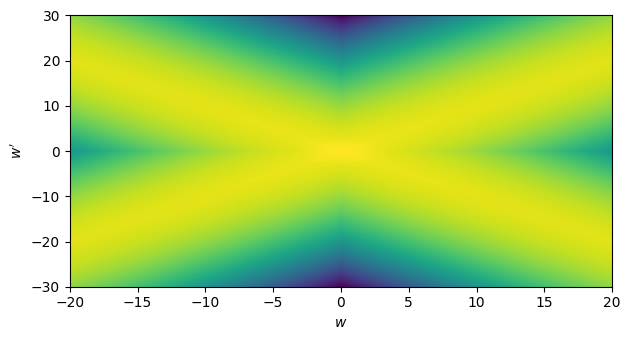

In [4]:
fig = plt.figure(figsize=(7,7))
plt.imshow(np.log(Rwwwp),extent=[-20,20,-30,30],origin="lower")
plt.gca().set_aspect(0.3333)
plt.xlabel(r'$w$')
plt.ylabel(r"$w'$")

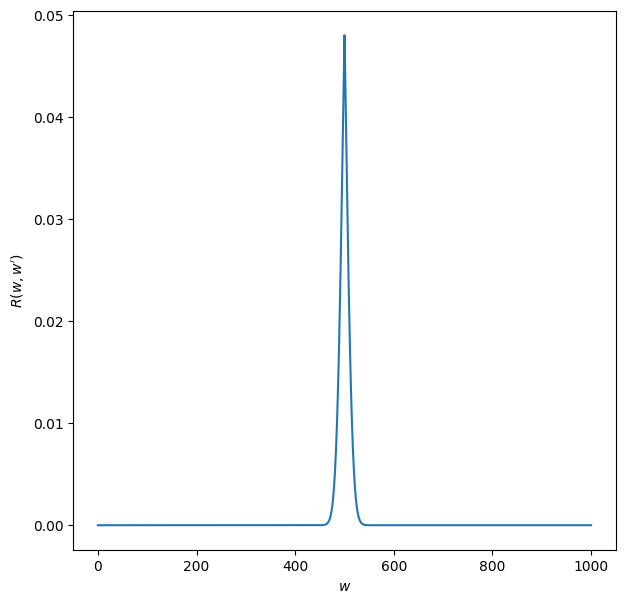

In [6]:
# Lets plot a column
fig = plt.figure(figsize=(7,7))
plt.plot(Rwwwp[:,500])
plt.xlabel(r'$w$')
plt.ylabel(r"$R(w,w')$")
plt.show()

In [7]:
# Normalize

get_pdf(Rwwwp)

PDF of w' direction is saved as Rwwp_normalized.txt


In [8]:
# Get cdf
RN = np.loadtxt('Rwwp_normalized.txt')
print(RN.shape)
get_cdf(RN)

(1001, 1001)
CDF of w' direction is saved as Rwwp_cdf.txt


Text(0, 0.5, "$w'$")

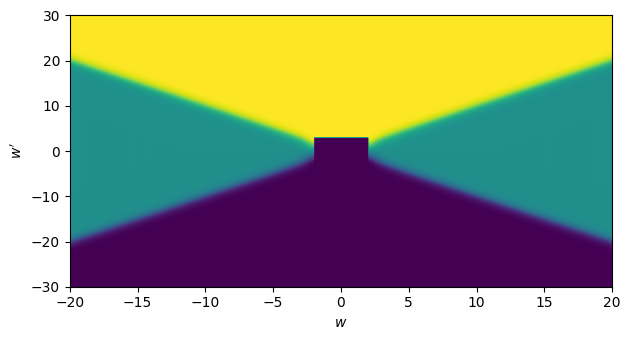

In [9]:
Rint = np.loadtxt('Rwwp_cdf.txt')
Rint[450:550, 450:550] = 10e-24
np.savetxt('Rwwp_cdf_modified.txt', Rint)
w,wp,nw,nwp = init_w_array()
fig = plt.figure(figsize=(7,7))
plt.imshow(Rint,extent=[-20,20,-30,30],origin="lower")
plt.gca().set_aspect(0.33333)
plt.xlabel(r'$w$')
plt.ylabel(r"$w'$")

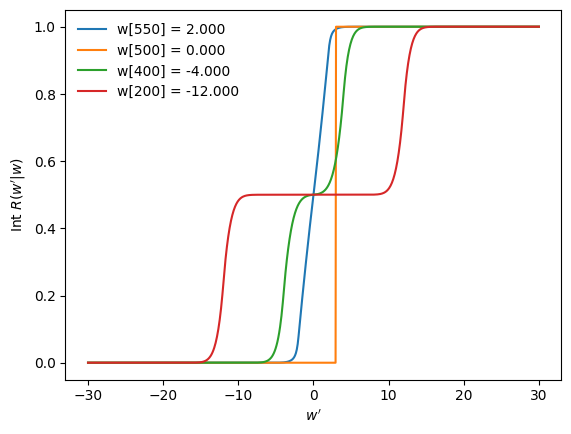

In [13]:
#Rint = Rint/0.06

i = 550
s = "w[%d] = %4.3f" % (i,w[i])
plt.plot(wp,Rint[:,i],label=s)

i = 500
s = "w[%d] = %4.3f" % (i,w[i])
plt.plot(wp,Rint[:,i],label=s)
i = 400
s = "w[%d] = %4.3f" % (i,w[i])
plt.plot(wp,Rint[:,i],label=s)


i = 200
s = "w[%d] = %4.3f" % (i,w[i])
plt.plot(wp,Rint[:,i],label=s)

plt.ylabel(r"Int $R(w'|w)$")
plt.xlabel(r"$w'$")

plt.legend(frameon=False)

Text(0, 0.5, "$w'$")

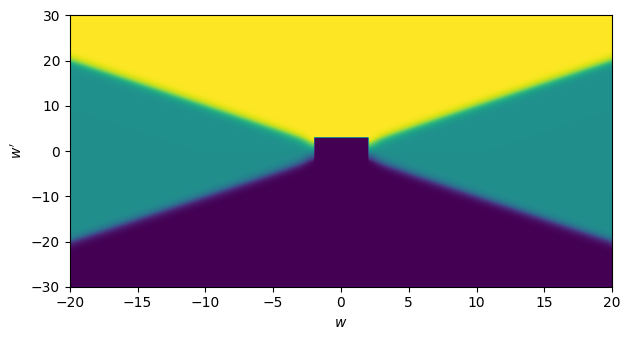

In [11]:
Rint = np.loadtxt('Rwwp_cdf_modified.txt')
w,wp,nw,nwp = init_w_array()
fig = plt.figure(figsize=(7,7))
plt.imshow(Rint,extent=[-20,20,-30,30],origin="lower")
plt.gca().set_aspect(0.33333)
plt.xlabel(r'$w$')
plt.ylabel(r"$w'$")